# 2.Binary task-model

### Import libraries
The required libraries for this notebook are pandas, sklearn, copy, numpy, pickle and matplotlib.




In [1]:
# import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
import joblib

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

### Load the data
We are going to use the Brain Tumors dataset 

In [76]:
data=pd.read_csv('./dataset/label.csv')
df0=pd.DataFrame(data)

In [77]:
data_reduced=np.load('Data_reduced.npy')

In [78]:
target=[]
for tumor in df0.label:
    if tumor == 'no_tumor':
        target.append(0)
    else:
        target.append(1)
target = np.array(target)

In [79]:
counts=Counter(target)
print(counts)# show the distribution of sample

Counter({1: 2546, 0: 454})


0 represents No tumor，1 represents Tumor

### Shuffle and split the data into training and test set

In [80]:
values= data_reduced.copy()
#print(values)

In [81]:
values, target = shuffle(values,target)
x_train, x_test, y_train, y_test = train_test_split(values, target, train_size=0.8, random_state=0)

In [82]:
print(x_train.shape, x_test.shape, len(y_train), len(y_test))

print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(values)),3),
                                                       round((len(y_test)*1.0)/len(values),3)))

(2400, 839) (600, 839) 2400 600
train set: 0.8  | test set: 0.2


In [83]:
# Pre-process data
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

> Scaling the data with MinMaxScaler or StandartScaler can basically get ready the data for the Machine Learning algorithm which can help converging.

### 1.Logistic Regression

In [84]:
def logRegrPredict(x_train, y_train,x_test ):
    # Build Logistic Regression Model
    log_reg = LogisticRegression(penalty='l2',max_iter =50,solver='lbfgs')
    # Train the model using the training sets
    log_reg.fit(x_train, y_train)
    y_pred= log_reg.predict(x_test)
    joblib.dump(log_reg, './model/log_binary.m')
    return y_pred

y_pred_logRegr = logRegrPredict(x_train2, y_train,x_test2)
print(y_pred_logRegr)

print(confusion_matrix(y_test, y_pred_logRegr))
print('Accuracy on test set: '+str(accuracy_score(y_test,y_pred_logRegr)))
print(classification_report(y_test,y_pred_logRegr))

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 

### 2.K-Nearest Neighbours

In [11]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model


    Y_pred_KNN = neigh.predict(X_test)
    joblib.dump(neigh, './model/knn_binary.m')
    #knn = joblib.load('./model/knn_binary.m')
    return Y_pred_KNN

In [12]:
score_list=[]

for i in range(1,36):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train)
    pred_i_KNN = knn.predict(x_test1)
    score_list.append(metrics.accuracy_score(y_test,pred_i_KNN))

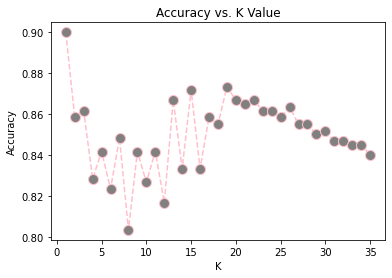

In [13]:
plt.plot(range(1,36),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.savefig('./Diagram/KNNClassifier.png')
plt.ylabel("Accuracy")
plt.show()

In [14]:
#high_score=score_list.index(np.max(score_list))+1

In [15]:
y_pred_KNN=KNNClassifier(x_train, y_train, x_test,1)

score=metrics.accuracy_score(y_test,y_pred_KNN)
print('K-Nearest Neighbours Accuracy on test set:',score)

K-Nearest Neighbours Accuracy on test set: 0.9383333333333334


### 3. Support Vector Machine (SVM)

In [16]:
def img_SVM(x_train, y_train, x_test, y_test):
    SVM_class = svm.SVC(kernel='rbf')

    SVM_class.fit(x_train, y_train)

    pred_SVM = SVM_class.predict(x_test)
    joblib.dump(SVM_class, './model/SVM_binary.m')
    print(pred_SVM)

    print("Accuracy:", accuracy_score(y_test, pred_SVM))
    return pred_SVM
pred_SVM=img_SVM(x_train, y_train, x_test, y_test)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 

In [17]:
SVM = joblib.load('./model/SVM_binary.m')

In [18]:
test_Proportion=Counter(y_test)
print(test_Proportion)

Counter({1: 504, 0: 96})


In [19]:
logRegr_Proportion=Counter(y_pred_logRegr)
print(logRegr_Proportion)

Counter({1: 535, 0: 65})


In [20]:
KNN_Proportion=Counter( y_pred_KNN)
print(KNN_Proportion)

Counter({1: 519, 0: 81})


In [21]:
SVM_Proportion=Counter(pred_SVM)
print(SVM_Proportion)

Counter({1: 542, 0: 58})


In [22]:
Compare={'target':test_Proportion,'Log':logRegr_Proportion,'KNN':KNN_Proportion,'SVM':SVM_Proportion}
Com_table=pd.DataFrame(Compare)
Com_table

,target,Log,KNN,SVM
1,504,535,519,542
0,96,65,81,58


## !!!!Contents below don't included in the paper!!!!

In [23]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

### 4.Decision Tree

In [24]:
#Importing the Decision tree classifier from the sklearn library.
tree_params={
    'criterion':'entropy'
}
DT = tree.DecisionTreeClassifier( **tree_params )
DT.fit(x_train,y_train)
y_pred_tree =  DT.predict(x_test)

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=DT.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_tree))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.875


In [25]:
tree_params={
    'criterion': 'entropy',
    'min_samples_split':30
}
DT = tree.DecisionTreeClassifier(**tree_params)
DT.fit(x_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=DT.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_tree))

Accuracy Score on train data:  0.9675
Accuracy Score on the test data:  0.875


### 5. Ensemble Methods

In [26]:
def baggingClassifierML(X_train, y_train, X_test,k):

    #Create baggingobject with a K coefficient
    bagmodel=BaggingClassifier(n_estimators=k,max_samples=0.5, max_features=4,random_state=1)
    bagmodel.fit(X_train, y_train) # Fit bagging model


    Y_pred = bagmodel.predict(X_test)
    #print (Y_pred)
    return Y_pred

In [27]:
score_list=[]

for i in range(1,25):
    Y_pred_i_bagging=baggingClassifierML(x_train, y_train, x_test, i)
    score_list.append(metrics.accuracy_score(y_test,Y_pred_i_bagging))

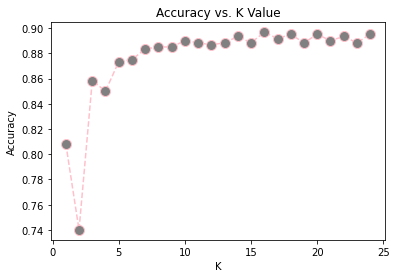

In [28]:
plt.plot(range(1,25),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [29]:
Y_pred_bagging=baggingClassifierML(x_train, y_train, x_test,10)
score=metrics.accuracy_score(y_test,Y_pred_bagging)
print(score)

0.89


In [30]:
def boostingClassifierML(X_train, y_train, X_test,k):
    boostmodel=AdaBoostClassifier(n_estimators=k)
    boostmodel.fit(X_train , y_train,sample_weight=None)


    Y_pred = boostmodel.predict(X_test)
    #print (Y_pred)
    return Y_pred

In [31]:
score_list=[]

for i in range(1,25):
    Y_pred_i_boosting=boostingClassifierML(x_train2, y_train, x_test2, i)
    score_list.append(metrics.accuracy_score(y_test,Y_pred_i_boosting))

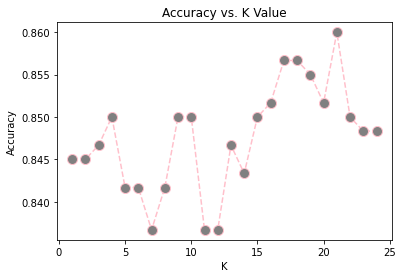

In [32]:
plt.plot(range(1,25),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [33]:
Y_pred_boosting=boostingClassifierML(x_train2, y_train, x_test2, 100)
score=metrics.accuracy_score(y_test,Y_pred_boosting)
print(score)

0.9116666666666666
